In [1]:
import pandas as pd
from paths import csv_path


ID = 6

q = pd.read_csv(csv_path(id=ID, problem_name="brain", solver_name="adv"))

In [2]:
import numpy as np


scores = q.mod_score
matrix_res = q.matrix_res

m = np.array(matrix_res)
s = np.array(scores)

In [3]:
gr_by_res = (
    q.groupby(q.matrix_res, group_keys=True)
    .agg({"mod_score": ["mean", "std", "max"]})
    .apply(lambda x: x)
)
gr_by_res

mod_score                    
                mean       std       max
matrix_res                              
0.800000    0.327732  0.034638  0.350007
0.842857    0.362951  0.044290  0.409751
0.885714    0.368128  0.013483  0.382711
0.928571    0.387212  0.022714  0.426862
0.971429    0.396015  0.022382  0.424992
1.014286    0.406160  0.018809  0.429633
1.057143    0.421657  0.014512  0.436417
1.100000    0.415566  0.006421  0.419601
1.142857    0.413165  0.013362  0.432652
1.185714    0.408071  0.021083  0.428248
1.228571    0.406225  0.016096  0.433951
1.271429    0.401584  0.024179  0.437518
1.314286    0.403703  0.022554  0.427795
1.357143    0.379085  0.024299  0.403490
1.400000    0.361034  0.017654  0.380438

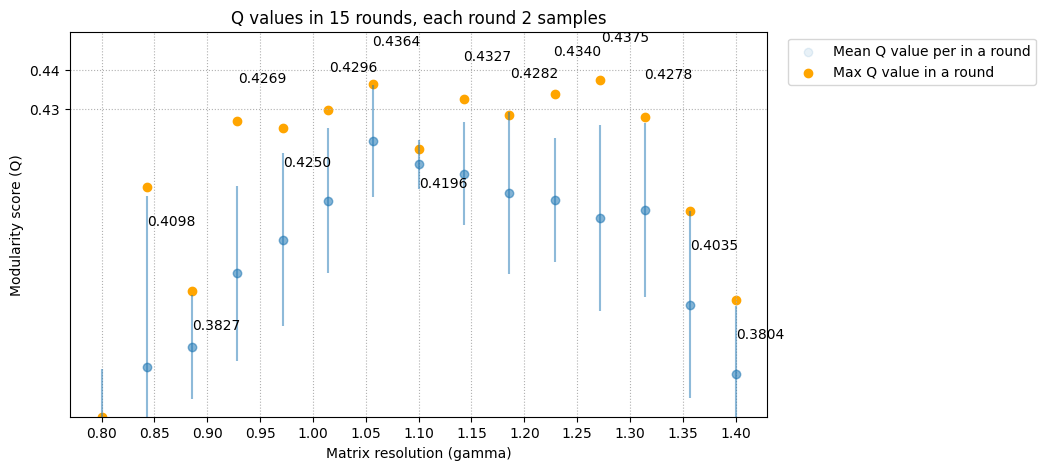

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


plt.rcParams["figure.figsize"] = (9, 5)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, ax = plt.subplots()

ax.xaxis.set_major_locator(x_major_ticker)
ax.xaxis.set_minor_locator(x_minor_ticker)

ax.set_title("Q values in 15 rounds, each round 2 samples")
ax.set_xlabel("Matrix resolution (gamma)")
ax.set_ylabel("Modularity score (Q)")

ax.grid(which="major", linestyle=":")

ax.set_ylim(0.35, 0.45)
ax.set_yticks(np.arange(0.43, 0.44, 0.01))
# ax.set_xlim(1, 1.3)
ax.set_xticks(np.arange(0.8, 1.5, step=0.05))


ax.scatter(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["mean"],
    label="Mean Q value per in a round",
    alpha=0.1,
)
ax.scatter(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["max"],
    c="orange",
    label="Max Q value in a round",
)
ax.errorbar(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["mean"],
    yerr=gr_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)


x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(
        zip(gr_by_res.index, gr_by_res.mod_score["max"])
    )
]
y_offsets = [0.01 if x > 0.425 else -0.01 for x in gr_by_res.mod_score["max"]]
for i, (k, v) in enumerate(gr_by_res.mod_score["max"].items()):
    ax.annotate(text=f"{v:.4f}", xy=(k + x_offsets[i], v + y_offsets[i]))

ax.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [6]:
ID = 7

q = pd.read_csv(csv_path(id=ID, problem_name="brain", solver_name="adv"))

scores = q.mod_score
matrix_res = q.matrix_res

m = np.array(matrix_res)
s = np.array(scores)

gr_by_res = (
    q.groupby(q.matrix_res, group_keys=True)
    .agg({"mod_score": ["mean", "std", "max"]})
    .apply(lambda x: x)
)
gr_by_res

mod_score                    
                mean       std       max
matrix_res                              
0.4         0.004615  0.006731  0.009374
0.5         0.020276  0.008849  0.026533
0.6         0.257515  0.012673  0.266477
0.7         0.330082  0.031247  0.352176
0.8         0.319207  0.015063  0.329858
0.9         0.400760  0.029530  0.421641
1.0         0.398652  0.024453  0.415943
1.1         0.422849  0.014768  0.433291
1.2         0.403695  0.031571  0.426019
1.3         0.389389  0.011101  0.397239
1.4         0.390727  0.000234  0.390893
1.5         0.296285  0.037484  0.322790
1.6         0.331905  0.039753  0.360014
1.7         0.289442  0.012464  0.298255
1.8         0.355045  0.011528  0.363196

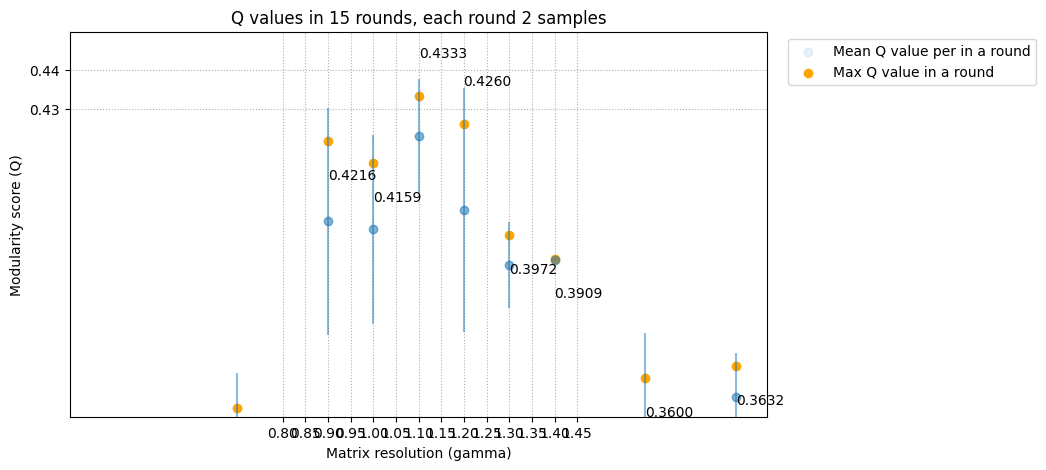

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


plt.rcParams["figure.figsize"] = (9, 5)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, ax = plt.subplots()

ax.xaxis.set_major_locator(x_major_ticker)
ax.xaxis.set_minor_locator(x_minor_ticker)

ax.set_title("Q values in 15 rounds, each round 2 samples")
ax.set_xlabel("Matrix resolution (gamma)")
ax.set_ylabel("Modularity score (Q)")

ax.grid(which="major", linestyle=":")

ax.set_ylim(0.35, 0.45)
ax.set_yticks(np.arange(0.43, 0.44, 0.01))
# ax.set_xlim(1, 1.3)
ax.set_xticks(np.arange(0.8, 1.5, step=0.05))


ax.scatter(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["mean"],
    label="Mean Q value per in a round",
    alpha=0.1,
)
ax.scatter(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["max"],
    c="orange",
    label="Max Q value in a round",
)
ax.errorbar(
    gr_by_res.mod_score.index,
    gr_by_res.mod_score["mean"],
    yerr=gr_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)


x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(
        zip(gr_by_res.index, gr_by_res.mod_score["max"])
    )
]
y_offsets = [0.01 if x > 0.425 else -0.01 for x in gr_by_res.mod_score["max"]]
for i, (k, v) in enumerate(gr_by_res.mod_score["max"].items()):
    ax.annotate(text=f"{v:.4f}", xy=(k + x_offsets[i], v + y_offsets[i]))

ax.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [4]:
l = pd.read_csv(
    "demo\\network_community_detection\\demo_output\\louvain\\csv_files\\karate_louvain_solution.csv"
)

FileNotFoundError: [Errno 2] No such file or directory: 'demo\\network_community_detection\\demo_output\\louvain\\csv_files\\karate_louvain_solution.csv'

In [6]:
l.describe()

,k,mod_score,run_time
count,100.0,100.000000,100.000000
mean,2.0,0.653471,0.002191
std,0.0,0.003565,0.000647
min,2.0,0.636092,0.000982
25%,2.0,0.654195,0.001999
50%,2.0,0.654195,0.002000
75%,2.0,0.654195,0.002998
max,2.0,0.654195,0.003999


NameError: name 'l' is not defined

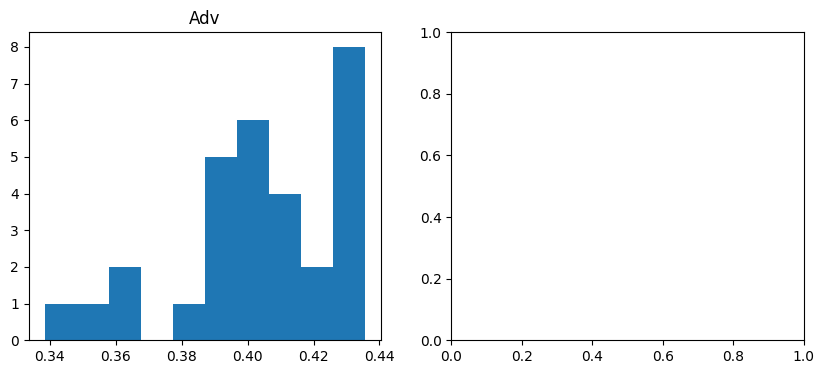

In [275]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

axes[0].hist(q.mod_score)
axes[0].set_title("Adv")
# axes[0].set_xticks(np.arange(0.63, 0.66, 0.01))

axes[1].hist(l.mod_score)
axes[1].set_title("Louvain")
axes[1].set_xticks(np.arange(0.63, 0.66, 0.01))